## Ejercicio 3 (25 puntos)

Con este **conjunto de datos misteriosos** (con tres clases):

> 📌 En el archivo de datos de este ejercicio, la **primera columna corresponde a la etiqueta o clase (1, 2 o 3)**, y el resto de las columnas son variables o predictores.

In [17]:
import pandas as pd
import numpy as np

In [11]:
# Cargar txt en np.array y luego cargarlo a DF

data_dir = "./misterious_data_2.txt"
data_array = np.loadtxt(data_dir)
df = pd.DataFrame(data_array)

# Separar etiquetas clase y predictores
y = df.iloc[:, 0]      # primera columna como clase
X = df.iloc[:, 1:]     # el resto como variables predictoras
y, X

(0      1.0
 1      1.0
 2      1.0
 3      1.0
 4      1.0
       ... 
 229    3.0
 230    3.0
 231    3.0
 232    3.0
 233    3.0
 Name: 0, Length: 234, dtype: float64,
           1         2         3         4         5         6         7    \
 0   -0.405533  2.242719  2.242719 -0.405533  0.095136  2.367101  2.367101   
 1   -1.238295 -1.011814 -1.011814 -1.238295 -1.154385 -0.921107 -0.921107   
 2   -0.702202 -2.371735 -2.371735 -0.702202 -0.876015 -1.759448 -1.759448   
 3   -0.909662 -1.737973 -1.737973 -0.909662 -0.800335 -1.861995 -1.861995   
 4   -0.547449 -2.673609 -2.673609 -0.547449 -0.582630 -2.438873 -2.438873   
 ..        ...       ...       ...       ...       ...       ...       ...   
 229 -0.531896 -2.340598 -2.340598 -0.531896 -0.632072 -1.881442 -1.881442   
 230 -1.449627 -0.893874 -0.893874 -1.449627 -1.704107 -0.644610 -0.644610   
 231 -1.037779 -1.708317 -1.708317 -1.037779 -1.194504 -1.374457 -1.374457   
 232 -0.287581 -1.852582 -1.852582 -0.287581 -0.3

1. Encuentra el mejor valor del parámetro `k` del clasificador **k-NN** utilizando validación cruzada. Para ello:
   - Grafica el rendimiento obtenido con validación cruzada para diferentes valores del parámetro `k`. Se recomienda: `k = 1, 2, 3, ..., 40`.
   - Selecciona el **mejor valor de k** con los resultados del punto anterior.
   - Evalúa con **validación cruzada anidada** el rendimiento del modelo incluyendo **selección de hiperparámetros**.

In [19]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

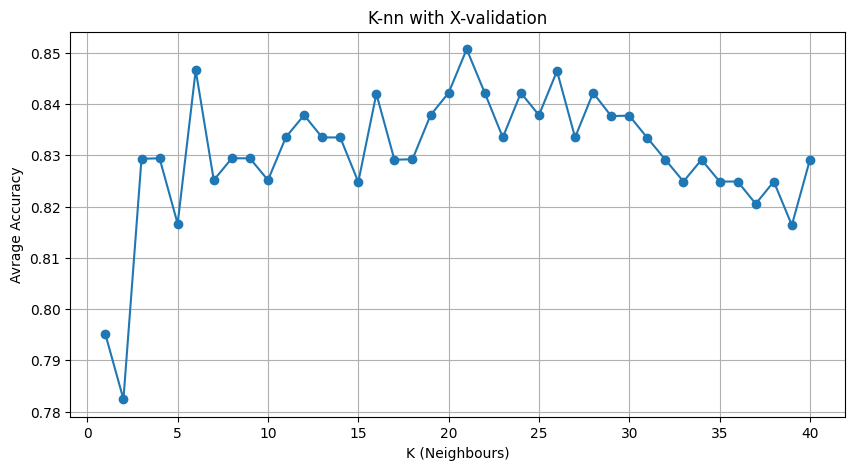

Best K: 21


In [21]:
k_range = range(1, 41) # 1 a 40
mean_scores = []

for k in k_range:
    model = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=k))
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy') # Usando cross val
    mean_scores.append(scores.mean())

# Graph
plt.figure(figsize=(10, 5))
plt.plot(k_range, mean_scores, marker='o')
plt.xlabel("K (Neighbours)")
plt.ylabel("Avrage Accuracy")
plt.title("K-nn with X-validation")
plt.grid()
plt.show()

best_k = k_range[np.argmax(mean_scores)] # Select k with best accuracy
print(f"Best K: {best_k}")

In [25]:

#Usando X-validation Anidada

inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)

knn_pipeline = make_pipeline(StandardScaler(), KNeighborsClassifier())
param_grid_knn = {'kneighborsclassifier__n_neighbors': list(range(1, 41))}

grid_knn = GridSearchCV(knn_pipeline, param_grid_knn, cv=inner_cv)
nested_scores_knn = cross_val_score(grid_knn, X, y, cv=outer_cv)

print(f"Average Accuracy (Con x-val anidada): {nested_scores_knn.mean():.2f}")


Average Accuracy (Con x-val anidada): 0.93


2. Repite lo anterior, pero para un clasificador **SVM lineal** usando diferentes valores del factor de regularización:  
   `C = 0.000001, 0.000002, 0.000003, ..., 0.0001`

3. Repite el punto 1, pero con un clasificador **SVM de base radial**, para diferentes valores del parámetro del kernel:    `gamma = 0.000001, 0.000002, 0.000003, ..., 0.0002` 

In [26]:
""" 
SVM Lineal con Cross validation anidada

"""


C_values = np.linspace(0.000001, 0.0001, 100)
param_grid_svm_linear = {'svc__C': C_values}

svm_linear_pipeline = make_pipeline(StandardScaler(), SVC(kernel='linear'))

grid_svm_linear = GridSearchCV(svm_linear_pipeline, param_grid_svm_linear, cv=inner_cv)
nested_scores_svm_linear = cross_val_score(grid_svm_linear, X, y, cv=outer_cv)

print(f"Avg accuray para SVM lineal con cross-validation anidada: {nested_scores_svm_linear.mean():.4f}")


Avg accuray para (SVM lineal con cross-validation anidada): 0.8078


In [27]:
""" 
SVM Radial con Cross validation anidada

"""

gamma_values = np.linspace(0.000001, 0.0002, 100)
param_grid_svm_rbf = {'svc__gamma': gamma_values}

svm_rbf_pipeline = make_pipeline(StandardScaler(), SVC(kernel='rbf'))

grid_svm_rbf = GridSearchCV(svm_rbf_pipeline, param_grid_svm_rbf, cv=inner_cv)
nested_scores_svm_rbf = cross_val_score(grid_svm_rbf, X, y, cv=outer_cv)

print(f"Avg accuray para SVM RBF con cross-validation anidada: {nested_scores_svm_rbf.mean():.4f}")


Avg accuray para SVM RBF con cross-validation anidada: 0.9016
